## HW2 Unsupervised and Supervised Learning

**Deadline** 11:59 pm on November 3rd

In this assignment you'll gain some hands-on experience with principal components analysis (PCA) and Supervised Learning methods such as Support Vector Machine (SVM) and Random Forest.

You need to install the following libraries: tensorflow and pillow. But if you use co-lab, no need for additional installations. 

In the first problem, you will study how different numbers of principal components represent the images visually. For the second problem you will utilize sklearn built in functions to perform classification on the provided data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import pandas as pd

In [ ]:
# link google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem 2.1: PCA for dimension reduction (3 Points)

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST.

Pick a random seed in the next cell to select a random image of a handwritten $0$ from the MNIST data.

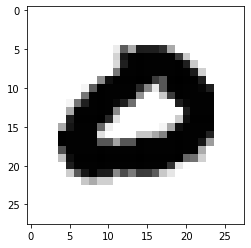

In [ ]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(369) # put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, 30, 40, 50$, use $k$-th principal components for MNIST $0$'s to approximately reconstruct the image selected above. Noting that we index from 0, namely 0-th pricipal component is the first one. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use the 'plot_images' function defined below.

In [ ]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Variance explained by first 50 principal vectors: 88.04%


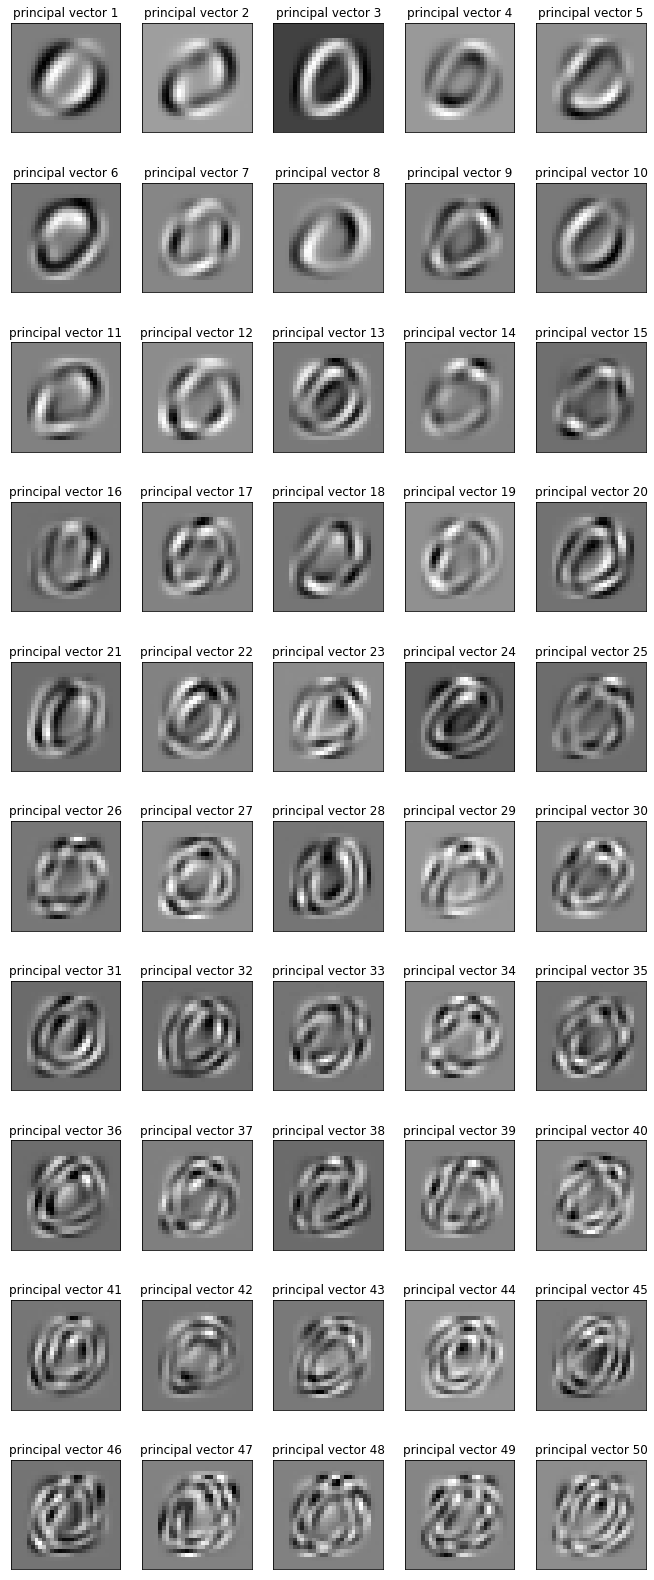

In [ ]:
from sklearn.decomposition import PCA

height = 28
width = 28


num_components = 50

# initialize and fit PCA
pca = PCA(num_components).fit(x)

# get principal_vectors (components) of the fitted pca (size = (n_components, n_features)). The components are sorted by explained_variance_.
principal_vectors = pca.components_

#reshape the principals vectors to the same size of input images
principal_vectors = principal_vectors.reshape((num_components, height, width))
# fit the model with x and apply the dimensionality reduction on x.
pcs = pca.fit_transform(x)

labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5)
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))


### Problem 2.2: SVM for classification (7 Points)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import sklearn.metrics as metrics
%matplotlib inline

In [ ]:
# load data
train_data = pd.read_csv('/content/drive/MyDrive/school/2022_Fall/400m/HW2/data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/school/2022_Fall/400m/HW2/data/test.csv')

# Set variables for the targets and features
y_train = train_data['price_range']
X_train = train_data.drop('price_range', axis=1)
y_test = test_data['price_range']
X_test = test_data.drop('price_range', axis=1)

In [ ]:
# Normalize Data
X_train_normalized = (X_train - X_train.std())/X_train.mean() 
X_test_normalized = (X_test - X_train.std())/X_train.mean() # normalize using parameters from training data

### 2.2.a

The linear kernel is written as $<x,x'>$.

The parameter C, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


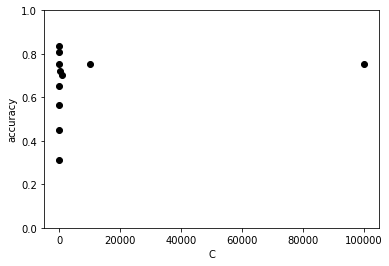

In [ ]:
from sklearn.svm import LinearSVC
prediction_results = []
accuracy_results = []
# Train Linear kernel SVM for different values of C on train data
Cs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
for c in Cs:
  lsvc = LinearSVC(random_state = 7, C = c)
  # Fit the model and get prediction and evalutation on testing data.
  lsvc.fit(X_train_normalized, y_train)
  # Save your results
  prediction_results.append(lsvc.predict(X_test_normalized))

# Plot accuracy on test data
for i in range(len(Cs)):
  accuracy_results.append(metrics.accuracy_score(y_test, prediction_results[i]))

plt.plot(Cs, accuracy_results, 'o', color='black')
plt.ylim([0, 1])
plt.xlabel("C")
plt.ylabel("accuracy")
plt.show()

### 2.2.b

The RBF kernel is expressed as $exp(γ\|x-x' \|)$.

$\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

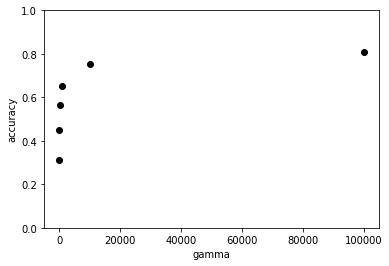

In [ ]:
from sklearn.svm import SVC
prediction_results_rsvc = []
accuracy_results_rsvc = []

# Train RBF kernel SVM for different values of gamma on train data

gammas = [10e-1, 10e0, 10e1, 10e2, 10e3, 10e4] #  hyper-parameter candidates
for g in gammas:
  rsvc = SVC(random_state = 7, C=1.0, kernel='rbf', gamma = g)
  # Fit the model and get prediction and evalutation on testing data.
  rsvc.fit(X_train_normalized, y_train)
  # Save your results
  prediction_results_rsvc.append(rsvc.predict(X_test_normalized))


# Plot accuracy on test data
for i in range(len(gammas)):
  accuracy_results_rsvc.append(metrics.accuracy_score(y_test, prediction_results[i]))

plt.plot(gammas, accuracy_results_rsvc, 'o', color='black')
plt.ylim([0, 1])
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.show()

### 2.2.c

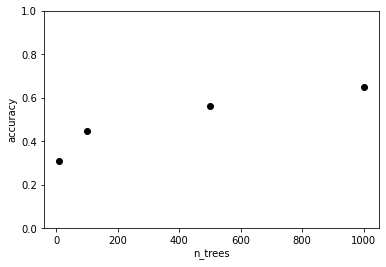

In [ ]:
from sklearn.ensemble import RandomForestClassifier
prediction_results_rf = []
accuracy_results_rf = []

n_trees = [10, 100, 500, 1000] # fill in the hyper-parameter candidates
# Train Random Forest for different values of number of estimators on train data
for n in n_trees:
  rf = RandomForestClassifier(random_state = 7, n_estimators=n)
  # Fit the model and get prediction and evalutation on testing data.
  rf.fit(X_train_normalized, y_train)
  # Save your results
  prediction_results_rf.append(rf.predict(X_test_normalized))

# Plot accuracy on test data
for i in range(len(n_trees)):
  accuracy_results_rf.append(metrics.accuracy_score(y_test, prediction_results[i]))

plt.plot(n_trees, accuracy_results_rf, 'o', color='black')
plt.ylim([0, 1])
plt.xlabel("n_trees")
plt.ylabel("accuracy")
plt.show()

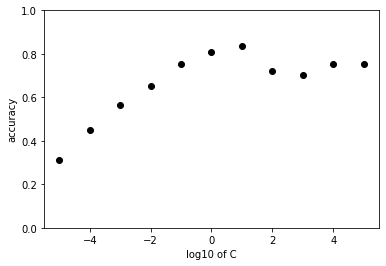

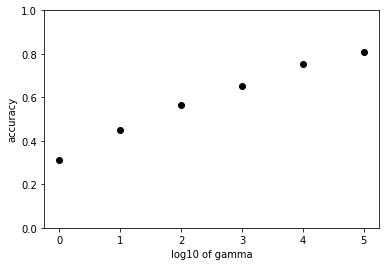

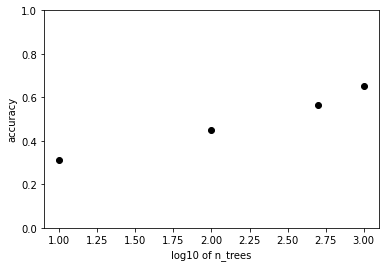

In [ ]:
## I thought it might be easier to visulize some of the values plotted vs the log10 of the value against accuracy
plt.plot(np.log10(Cs), accuracy_results, 'o', color='black')
plt.ylim([0, 1])
plt.xlabel("log10 of C")
plt.ylabel("accuracy")
plt.show()

plt.plot(np.log10(gammas), accuracy_results_rsvc, 'o', color='black')
plt.ylim([0, 1])
plt.xlabel("log10 of gamma")
plt.ylabel("accuracy")
plt.show()

plt.plot(np.log10(n_trees), accuracy_results_rf, 'o', color='black')
plt.ylim([0, 1])
plt.xlabel("log10 of n_trees")
plt.ylabel("accuracy")
plt.show()

### 2.2.d

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection   
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
n_folds = 5

# configure the cross-validation procedure
cv = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=7)


# TODO: define search space
space_lsvc = [{'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]}]
space_rsvc = {'gamma': [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]}
space_rf = {'n_estimators': [10, 100, 500, 1000]}

# TODO: define the model for parts a, b, and C
lsvc = LinearSVC()
rsvc = SVC()
rf = RandomForestClassifier()

# Perform a grid search and cross-validation to find the optimal hyperparameters of parts a, b, and c
##a
search_lsvc = GridSearchCV(lsvc, space_lsvc, scoring='accuracy', n_jobs=-1, cv=cv)
result_lsvc = search_lsvc.fit(X_train_normalized, y_train)
##b
search_rsvc = GridSearchCV(rsvc, space_rsvc, scoring='accuracy', n_jobs=-1, cv=cv)
result_rsvc = search_rsvc.fit(X_train_normalized, y_train)
##c
search_rf = GridSearchCV(rf, space_rf, scoring='accuracy', n_jobs=-1, cv=cv)
result_rf = search_rf.fit(X_train_normalized, y_train)

# For each part, report the optimal value
##a
best_model_a = result_lsvc.best_estimator_
print("best model for a: ", best_model_a)
##b
best_model_b = result_rsvc.best_estimator_
print("best model for b: ", best_model_b)
##c
best_model_c = result_rf.best_estimator_
print("best model for c: ", best_model_c)
# For each part, report the accuracy on test data for the best estimator
yhat_a = best_model_a.predict(X_test_normalized)
print("score for a: ", metrics.accuracy_score(y_test, yhat_a))
yhat_b = best_model_b.predict(X_test_normalized)
print("score for b: ", metrics.accuracy_score(y_test, yhat_b))
yhat_c = best_model_c.predict(X_test_normalized)
print("score for c: ", metrics.accuracy_score(y_test, yhat_b))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


best model for a:  LinearSVC(C=10.0)
best model for b:  SVC(gamma=0.1)
best model for c:  RandomForestClassifier(n_estimators=1000)
score for a:  0.836
score for b:  0.81
score for c:  0.81
